# Different MLP Architecture On MNIST Dataset

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('\nCategorical Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

## (1). Softmax Classifier with 2 hidden layers

### (1.a) Without dropout and Batch normalization

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal

# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# Initialising model
model_2 = Sequential()

# Adding first hidden layer
model_2.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_2.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer
model_2.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print("Model Summary :- \n",model_2.summary())

# Compiling the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_2 = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_11 (Dense)             (None, 52)                18980     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________
Model Summary :- 
 None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2625 - acc: 0.9249 - val_loss: 0.1344 - val_acc: 0.9590
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0996 - acc: 0.9705 - val_loss: 0.0971 - val_acc: 0.9704
Epoch 3/20
60000/60000 [===========================

Test score: 0.10713244834685151
Test accuracy: 0.9788


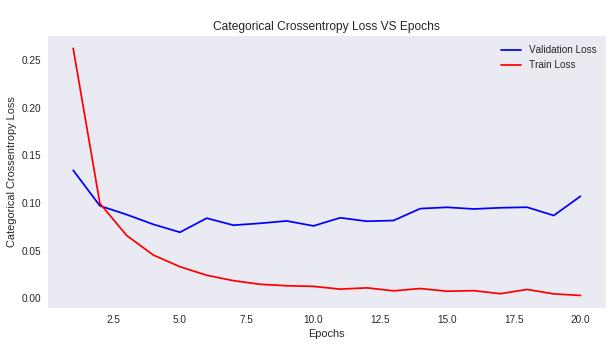

In [0]:
import matplotlib.pyplot as plt
# Evaluating the model
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_2_test = score[1]
model_2_train = history_2.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_2.history['val_loss']
# Training loss
ty = history_2.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### (1.b) With dropout and Batch Normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

# Initialising model
model_2d = Sequential()

# Adding first hidden layer
model_2d.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2d.add(BatchNormalization())
# Adding dropout to first hidden layer
model_2d.add(Dropout(0.5))

# Adding second hidden layer
model_2d.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2d.add(BatchNormalization())
# Adding dropout to second hidden layer
model_2d.add(Dropout(0.5))

# Adding output layer
model_2d.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print("Model Summary :- \n",model_2d.summary())

# Compiling the model
model_2d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_2d = model_2d.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_3 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_4 (Batch (None, 52)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                530       
Total para

Test score: 0.06424971719455207
Test accuracy: 0.9803


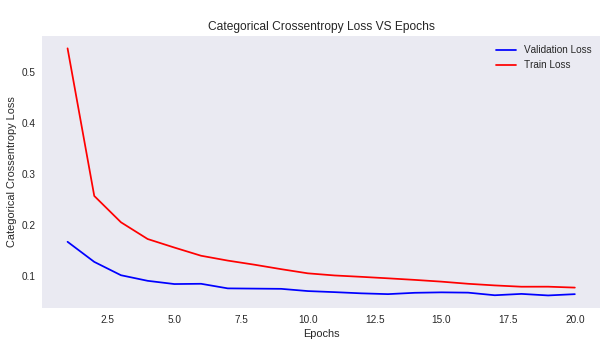

In [0]:

# Evaluating the model
score = model_2d.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_2d_test = score[1]
model_2d_train = history_2d.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_2d.history['val_loss']
# Training loss
ty = history_2d.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## (2). Softmax Classifier with 3 hidden layers

### (2.a) Without Dropout and Batch Normalization

In [0]:
# Initialising model
model_3 = Sequential()

# Adding first hidden layer
model_3.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_3.add(Dense(196, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding third hidden layer
model_3.add(Dense(98, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer
model_3.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_3.summary())

# Compiling the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_3 = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_20 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_21 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2318 - acc: 0.9323 - val_loss: 0.1132 - val_acc: 0.9635
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - l

Test score: 0.08825439285551874
Test accuracy: 0.984


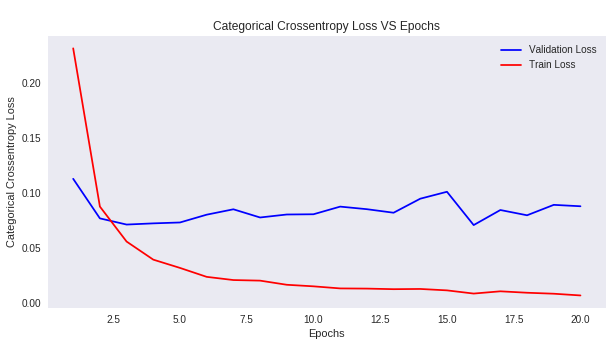

In [0]:
# Evaluating the model
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3_test = score[1]
model_3_train = history_3.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_3.history['val_loss']
# Training loss
ty = history_3.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### (2.b) With Droput and Batch Normalization

In [0]:
model_3d = Sequential()

# Adding first hidden layer
model_3d.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_3d.add(BatchNormalization())
# Adding dropout
model_3d.add(Dropout(0.5))

# Adding second hidden layer
model_3d.add(Dense(196, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_3d.add(BatchNormalization())
# Adding dropout
model_3d.add(Dropout(0.5))

# Adding third hidden layer
model_3d.add(Dense(98, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_3d.add(BatchNormalization())
# Adding dropout
model_3d.add(Dropout(0.5))

# Adding output layer
model_3d.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_3d.summary())

# Compiling the model
model_3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_3d = model_3d.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_5 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_5 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_6 (Batch (None, 196)               784       
_________________________________________________________________
dropout_6 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 98)                19306     
__________

Test score: 0.06754246267098933
Test accuracy: 0.9816


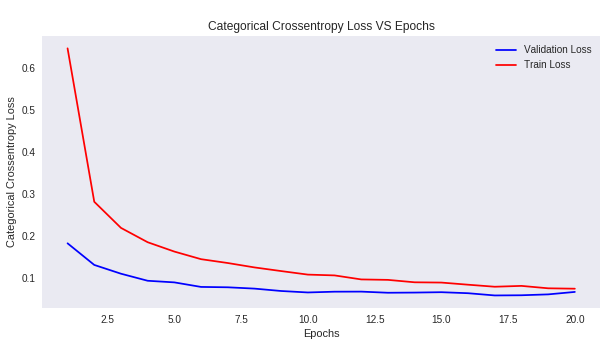

In [0]:
# Evaluating the model
score = model_3d.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3d_test = score[1]
model_3d_train = history_3d.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_3d.history['val_loss']
# Training loss
ty = history_3d.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## 3). Softmax Classifier with 5 hidden layers

### 3.a) Without Dropout and Batch Normalization

In [0]:
# Initialising model
model_5 = Sequential()

# Adding first hidden layer
model_5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_5.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding third hidden layer
model_5.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding fourth hidden layer
model_5.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding fifth hidden layer
model_5.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer
model_5.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_5.summary())

# Compiling the model
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_5 = model_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.10349378544007559
Test accuracy: 0.9775


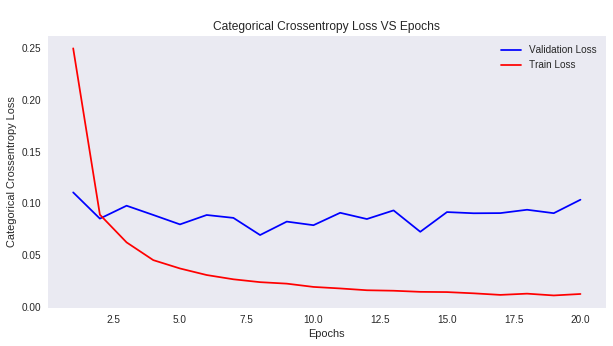

In [0]:
# Evaluating the model
score = model_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_5_test = score[1]
model_5_train = history_5.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_5.history['val_loss']
# Training loss
ty = history_5.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### (3.b) With Dropout and Batch Normalisation

In [0]:
# Initialising model
model_5d = Sequential()

# Adding first hidden layer
model_5d.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.5))

# Adding second hidden layer
model_5d.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.5))

# Adding third hidden layer
model_5d.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.5))

# Adding fourth hidden layer
model_5d.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.5))

# Adding fifth hidden layer
model_5d.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.5))

# Adding output layer
model_5d.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_5d.summary())

# Compiling the model
model_5d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_5d = model_5d.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
__________

Test score: 0.07800791863687337
Test accuracy: 0.9824


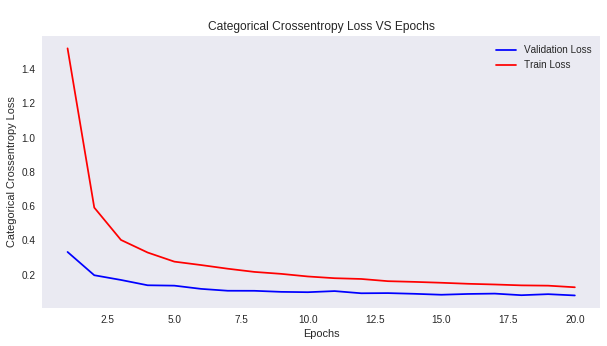

In [0]:
# Evaluating the model
score = model_5d.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_5d_test = score[1]
model_5d_train = history_5d.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_5d.history['val_loss']
# Training loss
ty = history_5d.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)


## Table (Different models with their train and test accuracies):

In [4]:
# Installing the library prettytable
!pip install prettytable

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["S.No.", "Model", "Training Accuracy", "Test Accuracy"]

x.add_row([1.,"MLP(2 Hidden Layer) Without Dropout and Normalization", 0.99,0.97])
x.add_row([2.,"MLP(2 Hidden Layer) With Dropout and Normalization", 0.97,0.98])

x.add_row([3.,"MLP(3 Hidden Layer) Without Dropout and Normalization", 0.99,0.98])
x.add_row([4.,"MLP(3 Hidden Layer) With Dropout and Normalization", 0.97,0.98])

x.add_row([5.,"MLP(5 Hidden Layer) Without Dropout and Normalization", 0.99,0.97])
x.add_row([6.,"MLP(5 Hidden Layer) With Dropout and Normalization", 0.97,0.98])

print(x) 

+-------+-------------------------------------------------------+-------------------+---------------+
| S.No. |                         Model                         | Training Accuracy | Test Accuracy |
+-------+-------------------------------------------------------+-------------------+---------------+
|  1.0  | MLP(2 Hidden Layer) Without Dropout and Normalization |        0.99       |      0.97     |
|  2.0  |   MLP(2 Hidden Layer) With Dropout and Normalization  |        0.97       |      0.98     |
|  3.0  | MLP(3 Hidden Layer) Without Dropout and Normalization |        0.99       |      0.98     |
|  4.0  |   MLP(3 Hidden Layer) With Dropout and Normalization  |        0.97       |      0.98     |
|  5.0  | MLP(5 Hidden Layer) Without Dropout and Normalization |        0.99       |      0.97     |
|  6.0  |   MLP(5 Hidden Layer) With Dropout and Normalization  |        0.97       |      0.98     |
+-------+-------------------------------------------------------+-----------------

## Conclusion:-

### Procedure followed:-

1. Load MNIST dataset

2. Split the dataset into train and test

3. Normalize the train and test data

4. Convert class variable into categorical data vector

5. Implement Softmax classifier with 2 , 3 and 5 hidden layers without Dropout and Batch Normalization .

6. Then Implemented with Dropout and Batch Normalization to the hidden layers .

7. Draw Categorical Crossentropy Loss VS No.of Epochs plot 
